(60000, 28, 28)
(10000, 28, 28)
Label: 0


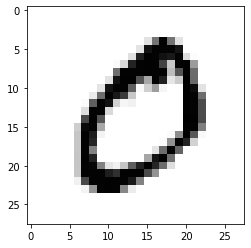

<class 'numpy.ndarray'>


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels)= mnist.load_data()
print(train_images.shape)
print(test_images.shape)

import matplotlib.pyplot as plt

image_index=1
print("Label:", train_labels[image_index])
plt.imshow(train_images[image_index], cmap='Greys')
plt.show()

print(type(train_images))

In [18]:
from keras import models
from keras import layers
import keras.utils
from tensorflow.keras import utils as np_utils
from keras.utils.np_utils import to_categorical

reg=keras.regularizers.L1(0.001)
network=models.Sequential()
network.add(layers.Dense(784, activation='gelu', input_shape=(28*28,)))
network.add (layers.Dense (200, activation='gelu'))
network.add(layers.Dense(10, activation='softmax'))

#data reshaping
train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype('float32')/255


print (train_labels[55511])
train_labels_categorical=to_categorical (train_labels)
test_labels_catgorical=to_categorical (test_labels)
print (train_labels_categorical[55511])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [21]:
import time

opt=tf.keras.optimizers.Adam(learning_rate=0.001)

network.compile (optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Precision()])
start_time = time.perf_counter()
history = network.fit(train_images, train_labels_categorical, epochs=5, batch_size=128)
elapsed_time = time.perf_counter()-start_time
test_loss, test_acc, test_presc=network.evaluate (test_images, test_labels_catgorical)
print('Runtime', elapsed_time)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.2221 - accuracy: 0.9350 - precision: 0.9544
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0780 - accuracy: 0.9759 - precision: 0.9794
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0476 - accuracy: 0.9848 - precision: 0.9869
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0307 - accuracy: 0.9901 - precision: 0.9912
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0653 - accuracy: 0.9819 - precision: 0.9835
Runtime 41.7117521560001


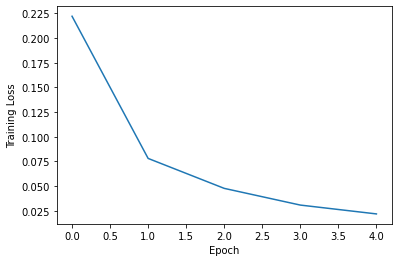

Test Loss 0.06531627476215363
Accuracy 0.9818999767303467


In [22]:
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
#plt.legend(['Validation', 'Test'])
#plt.xticks([0,1,2], ["1","2","3"])
#plt.axis([0,2,0.85,1])
plt.show()
print('Test Loss', test_loss)
print('Accuracy', test_acc)

In [25]:
#cross-validation

import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

opt=tf.keras.optimizers.Adam(learning_rate=0.5)
myskfold=StratifiedKFold (n_splits=3, shuffle=True, random_state=7)

Validation_accuracyList=[]
Validation_precisionList=[]
Validation_lossList=[]
test_accuracyList=[]
test_precisionList=[]
test_lossList=[]

for trainF, validationF in myskfold.split(train_images, train_labels):
  network.compile (optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Precision()])
  network.fit(train_images[trainF], train_labels_categorical[trainF], epochs=2, batch_size=128)
  Validation_loss, Validation_acc, Validation_presc=network.evaluate (train_images[validationF], train_labels_categorical[validationF])
  test_loss, test_acc, test_presc=network.evaluate (test_images, test_labels_catgorical)
  Validation_accuracyList.append (Validation_acc)
  Validation_lossList.append(Validation_loss)
  Validation_precisionList.append(Validation_presc)
  test_accuracyList.append (test_acc)
  test_lossList.append(test_loss)
  test_precisionList.append(test_presc)




Epoch 1/2
313/313 [==============================] - 9s 24ms/step - loss: 1694.4248 - accuracy: 0.1033 - precision_2: 0.1997
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 2.3269 - accuracy: 0.0980 - precision_2: 0.0000e+00
Epoch 1/2
313/313 [==============================] - 6s 17ms/step - loss: 2.6587 - accuracy: 0.1019 - precision_3: 0.0000e+00
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 2.3223 - accuracy: 0.1028 - precision_3: 0.0000e+00
Epoch 1/2
313/313 [==============================] - 6s 18ms/step - loss: 2.3246 - accuracy: 0.1018 - precision_4: 0.0000e+00
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 2.3197 - accuracy: 0.1135 - precision_4: 0.0000e+00


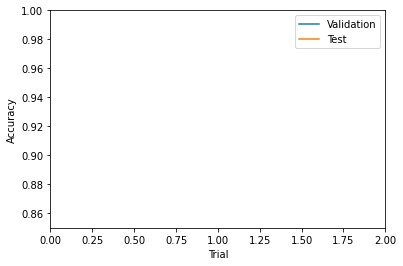

In [26]:
plt.plot(Validation_accuracyList)
plt.plot(test_accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Trial')
plt.legend(['Validation', 'Test'])
#plt.xticks([0,1,2], ["1","2","3"])
plt.axis([0,2,0.85,1])
plt.show()

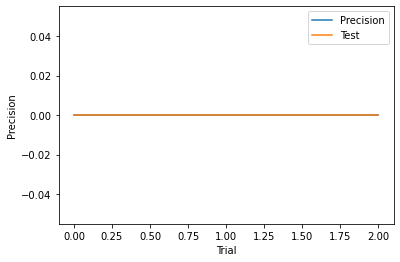

In [27]:
plt.plot(Validation_precisionList)
plt.plot(test_precisionList)
plt.ylabel('Precision')
plt.xlabel('Trial')
plt.legend(['Precision', 'Test'])
plt.xticks=([0,1,2,3])
plt.axis=[0,10,0.9,1]
plt.show()

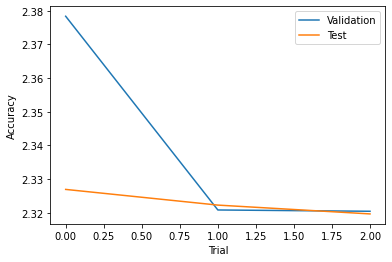

In [28]:
plt.plot(Validation_lossList)
plt.plot(test_lossList)
plt.ylabel('Accuracy')
plt.xlabel('Trial')
plt.legend(['Validation', 'Test'])
plt.xticks=([0,1,2,3])
plt.axis=[0,10,0.9,1]
plt.show()